In [1]:
from qiskit import QuantumCircuit
from math import sqrt
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram
from qiskit.quantum_info import Statevector, Operator

# Defining operator and checking that it is unitary

In [2]:
mtrx = Operator([[-3.95648146e-01-5.85588863e-01j,  3.95984437e-01+5.86297298e-01j,
        1.08188855e-04+1.03135776e-04j, 7.41913369e-05+6.94570418e-05j],
        
       [ 6.30717425e-02+5.70139009e-01j,  6.28919070e-02+5.69670758e-01j,
         -5.89041332e-02-5.33695114e-01j,  -2.53933279e-02-2.31383466e-01j],
        
       [ 2.78181692e-01+6.15604688e-02j,  2.77770733e-01+6.14956351e-02j,
        +7.81625477e-01+1.72831069e-01j,  -4.33512945e-01-9.56270032e-02j],
        
       [ 2.68215209e-01+1.35637574e-01j,  2.67759465e-01+1.35418666e-01j,
        2.37458657e-01+1.20433497e-01j, 7.72153495e-01+3.90535328e-01j]])

In [3]:
mtrx.is_unitary()

True

# Checking the $\frac{1}{2}[1, 1, 1, 1]$ vector

### Creating circuit with 2 Hadamard gates and evolving |00> statevector through it

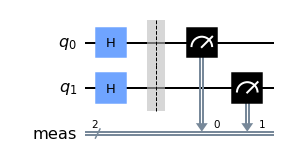

In [4]:
sv_before1 = Statevector.from_label('00')

qc_before1 = QuantumCircuit(2)
qc_before1.h([0,1])

sv_before1 = sv_before1.evolve(qc_before1)

qc_before1.measure_all()

qc_before1.draw('mpl')

### Evolved statevector has all possible 2-qubit states with equal amplitudes as expected

In [5]:
sv_before1.draw('latex')

<IPython.core.display.Latex object>

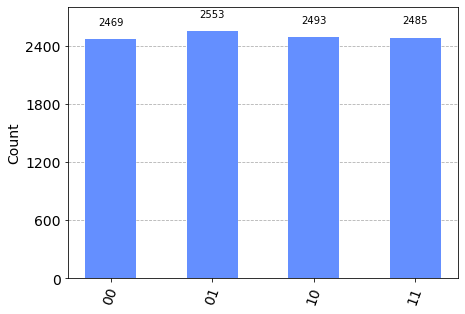

In [6]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc_before1,backend,shots=10000)
result = job_sim.result()
count = result.get_counts(qc_before1)
plot_histogram(count)

### Creating the same circuit but applying our mtrx after two Hadamards <br/> Initializing statevector to |00>

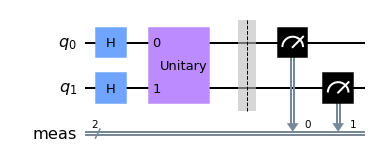

In [7]:
sv_after1 = Statevector.from_label('00')
qc_after1 = QuantumCircuit(2)
qc_after1.h([0,1])
qc_after1.append(mtrx, [0,1])

sv_after1 = sv_after1.evolve(qc_after1)

qc_after1.measure_all()
qc_after1.draw('mpl')

### Now the amplitude of |11> is bigger as expected

In [8]:
sv_after1.draw('latex')

<IPython.core.display.Latex object>

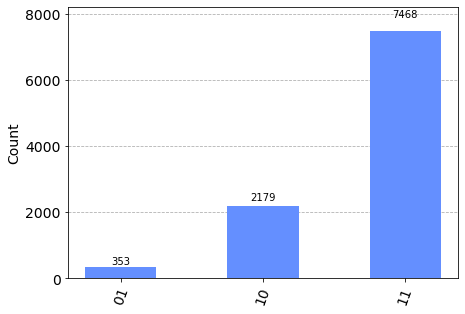

In [9]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc_after1,backend,shots=10000)
result = job_sim.result()
count = result.get_counts(qc_after1)
plot_histogram(count)

# Checking the $\frac{1}{\sqrt{3}}[1, 1, 1, 0]$ vector

### Creating circuit with two qubits and initializing them into desired state

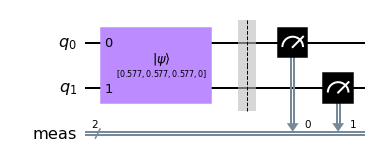

In [10]:
sv_before2 = Statevector.from_label('00')

qc_before2 = QuantumCircuit(2)
qc_before2.initialize([1/sqrt(3), 1/sqrt(3), 1/sqrt(3), 0])

sv_before2 = sv_before2.evolve(qc_before2)

qc_before2.measure_all()

qc_before2.draw('mpl')

### The evolved statevector is in superposition of the states that we wanted

In [11]:
sv_before2.draw('latex')

<IPython.core.display.Latex object>

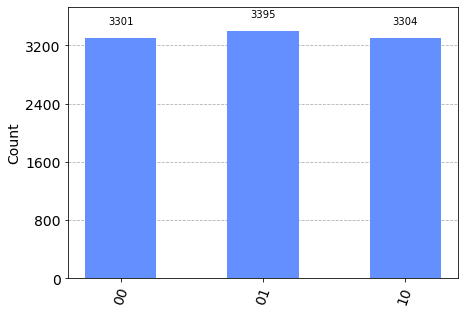

In [12]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc_before2,backend,shots=10000)
result = job_sim.result()
count = result.get_counts(qc_before2)
plot_histogram(count)

### Creating the same circuit and applying mtrx after initialization

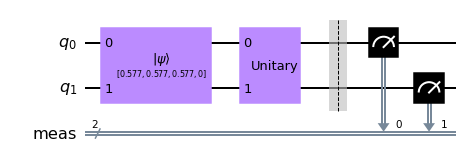

In [13]:
sv_after2 = Statevector.from_label('00')
qc_after2 = QuantumCircuit(2)
qc_after2.initialize([1/sqrt(3), 1/sqrt(3), 1/sqrt(3), 0])
qc_after2.append(mtrx, [0,1])

sv_after2 = sv_after2.evolve(qc_after2)

qc_after2.measure_all()
qc_after2.draw('mpl')

### Now the |10> state has the biggest amplitude as expected <br /> But now there is also the |11> state in superposition

In [14]:
sv_after2.draw('latex')

<IPython.core.display.Latex object>

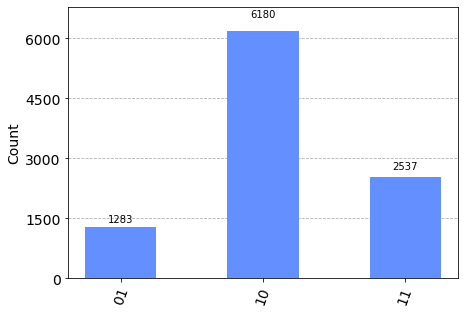

In [15]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc_after2,backend,shots=10000)
result = job_sim.result()
count = result.get_counts(qc_after2)
plot_histogram(count)

# Checking the $\frac{1}{\sqrt{2}}[0, 1, 1, 0]$ vector

### Defining circuit for creation of Bell $|\Psi^{+}>$ state

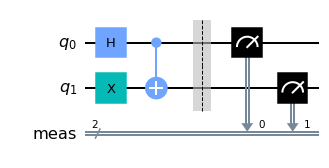

In [16]:
sv_before3 = Statevector.from_label('00')

qc_before3 = QuantumCircuit(2)
qc_before3.x(1)
qc_before3.h(0)
qc_before3.cx(0,1)

sv_before3 = sv_before3.evolve(qc_before3)

qc_before3.measure_all()

qc_before3.draw('mpl')

### The evolved statevector is in superposition of the states that we wanted

In [17]:
sv_before3.draw('latex')

<IPython.core.display.Latex object>

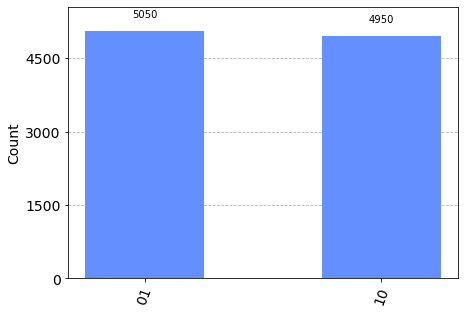

In [18]:
job_sim = execute(qc_before3,backend,shots=10000)
result = job_sim.result()
count = result.get_counts(qc_before3)
plot_histogram(count)

### Creating the same circuit and applying mtrx after initialization

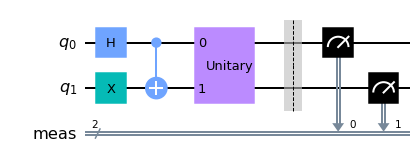

In [19]:
sv_after3 = Statevector.from_label('00')
qc_after3 = QuantumCircuit(2)
qc_after3.h(0)
qc_after3.x(1)
qc_after3.cx(0,1)
qc_after3.append(mtrx, [0,1])

sv_after3 = sv_after3.evolve(qc_after3)

qc_after3.measure_all()
qc_after3.draw('mpl')

### Now the amplitude of |10> is greater as expected <br /> But there are now |00> and |11> states that were not initially in the superposition

In [20]:
sv_after3.draw('latex')

<IPython.core.display.Latex object>

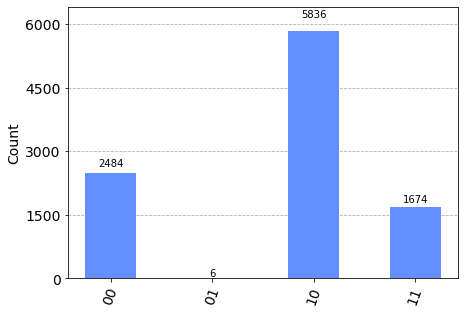

In [21]:
job_sim = execute(qc_after3,backend,shots=10000)
result = job_sim.result()
count = result.get_counts(qc_after3)
plot_histogram(count)